### Problem 4
In this question you will import data from the CSV file created in the Setup section above.

### Problem 4
This data represents the condition of an electrical mini-substation based on readings from voltage, current and temperature sensor readings. A condition of ‘0’ represents a properly functioning device, while a condition of ‘1’ represents failure.

### Problem 4
#### a) Which is worse for this use case, a false positive or a false negative? What value of β would be suitable for an Fβ score?

Let's take positive (a condition of "1") as a failure in device and negative (a condition of "0") as a properly functioning device.
For this use case, a false negative is worse.

A false positive will trigger the alert to the engineers. They will go and check but only to find out the electrical mini-substation is functioning properly. Although resources are used to do this check, it is still fine.

A false negative will cover up a failure in device and let the engineers think that the device is functioning properly. They cannot fix the failure in time. As a result, the electrical mini-substation may fail entirely and the loss can be huge.

Recall measures how many of positive points were correctly predicted by the model. Recall is low when the model creates many false negatives. Recall is a useful metric in models in which we don’t want many false negatives. Since higher values of β give recall more importance, and lower values of β give precision more importance, we would take a higher value of β. A value of 10 for β would be suitable for an Fβ score.

### Problem 4
#### b) Load the CSV file into an SFrame named data. Print the SFrame. Split the data into training/validation/testing sets using 80%/10%/10% respectively.

In [427]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import turicreate as tc
import seaborn as sns
from prettytable import PrettyTable as pp

In [428]:
# load the csv file into SFrame named data
data = tc.SFrame.read_csv("0380915_data.csv")

Finished parsing file /home/jryk/data/rrc_academic/comp2704_supervised_machine_learning/assignment_03/0380915_data.csv

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,float,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Parsing completed. Parsed 100 lines in 0.025702 secs.

Finished parsing file /home/jryk/data/rrc_academic/comp2704_supervised_machine_learning/assignment_03/0380915_data.csv

Parsing completed. Parsed 1000 lines in 0.005727 secs.

In [429]:
# print the SFrame
data

Condition,Voltage,Current,Temperature
1,25.666912748577367,443.1776787138455,39.04298008669625
1,24.93619269601364,443.7752058654272,36.615609013862766
1,26.431378686661073,440.70519661137064,59.53153475566279
1,25.75551597941211,444.45465600218176,42.75831261815376
1,25.97123695471139,442.8046424128778,37.65621788818368
1,25.88350340890212,444.5814752212545,39.4083109258523
0,26.94535437487196,442.3878725340347,45.120200601609525
1,26.490910090226947,444.4899725301915,40.08125414679967
1,25.279176510841378,442.3930666295656,38.47134221045628
1,26.083107828134683,441.3197317953561,52.22772264719654


In [430]:
# load the data into Pandas DataFrame for further analysis of input data
data_pd = data.to_dataframe()

In [431]:
# display info
# 4 columns of 1000 data points, all non-null 
# Condition is int; the rest are float
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Condition    1000 non-null   int64  
 1   Voltage      1000 non-null   float64
 2   Current      1000 non-null   float64
 3   Temperature  1000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [432]:
# display statistics of mean, std, min, max
data_pd.describe()

,Condition,Voltage,Current,Temperature
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.492000,13.343123,2431.442841,79.894669
std,0.500186,12.669705,1990.370210,33.993498
min,0.000000,0.665669,435.651881,35.021974
25%,0.000000,0.700784,442.088832,46.384343
50%,0.000000,11.536531,2419.554764,77.556892
75%,1.000000,26.005802,4421.033030,112.918979
max,1.000000,29.125338,4449.956595,129.991582


In [433]:
# set up theme for sns to display plots
sns.set_theme(style="whitegrid", palette="dark")

<AxesSubplot:xlabel='Voltage', ylabel='Count'>

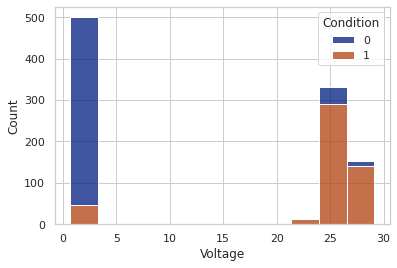

In [434]:
# show histogram of Voltage, with different color on Condition
# we can see Voltage appear at two ends
# Smaller end has majority in Condition 0 while larger end has majority in Condition 1
sns.histplot(data=data_pd, x="Voltage", hue="Condition", multiple="stack")

<AxesSubplot:xlabel='Current', ylabel='Count'>

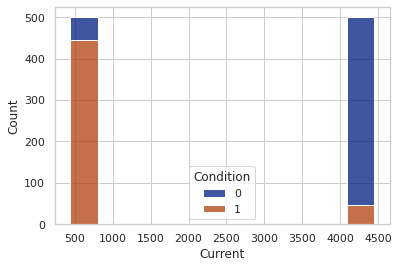

In [435]:
# show histogram of Current, with different color on Condition
# we can see Current appear at two ends
# Smaller end has majority in Condition 1 while larger end has majority in Condition 0
sns.histplot(data=data_pd, x="Current", hue="Condition", multiple="stack")

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

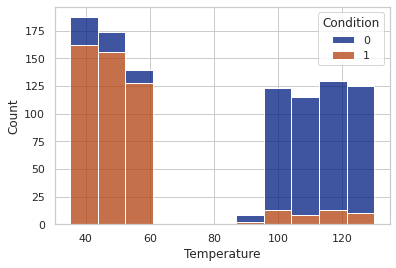

In [436]:
# show histogram of Temperature, with different color on Condition
# we can see Temperature appear at two ends
# Smaller end has majority in Condition 1 while larger end has majority in Condition 0
sns.histplot(data=data_pd, x="Temperature", hue="Condition", multiple="stack")

In [437]:
# after initial analysis of data, we can continue to treat the data set
# split data set into training dataset (80%) and the rest for testing and validation
train_data, test_validate_data = data.random_split(.8, seed=0, exact=True)

In [438]:
# split the rest data set into testing and valiation
# 10% / 20% = .5
test_data, validate_data = test_validate_data.random_split(.5, seed=0, exact=True)

In [439]:
# check the length of training set
print("Length of training set:", len(train_data))
# check the length of validation set
print("Length of validation set:", len(validate_data))
# check the length of testing set
print("Length of testing set:", len(test_data))

Length of training set: 800
Length of validation set: 100
Length of testing set: 100


### Problem 4
#### c) Is feature rescaling turned on by default for the function turicreate.logistic_classifier.create? What scale are the coefficients given in?

According to the Turi Create User Guide, feature rescaling is turned on by default. [feature_rescaling=True]

The coefficients are given in original scale of the problem. 

https://apple.github.io/turicreate/docs/userguide/supervised-learning/linear-regression.html#feature-rescaling

### Problem 4
#### d) Create perceptrons using Turicreate to classify data with ‘Condition’ as the target. Be sure to use your validation set in the training. Experiment with different values of hyperparameters to develop two different models.

### Problem 4
#### e) For each model:
##### i) find predictions using the testing set;
##### ii) display the training/validation/testing accuracy;
##### iii) display the confusion matrix on the testing set;
##### iv) calculate recall, precision, sensitivity and specificity on the testing set;
##### v) calculate the Fβ score on the testing set using the value of β you chose above.

In [440]:
# function to setup the perceptron model with hyperparameters
def perceptrons(l2_penalty, l1_penalty, feature_rescaling, convergence_threshold, 
                max_iterations, class_weights, solver, step_size):
    # create the perceptron model with fixed train_data, target, validation_set, verbose and seed
    perceptron = tc.logistic_classifier.create(
        train_data, target="Condition", 
        l2_penalty=l2_penalty, 
        l1_penalty=l1_penalty,
        feature_rescaling=feature_rescaling,
        convergence_threshold=convergence_threshold,
        max_iterations=max_iterations,
        class_weights=class_weights, 
        solver=solver, 
        step_size=step_size,
        validation_set=validate_data, verbose=True, seed=0
        )
    # return the model
    return perceptron    

In [441]:
# function to print the hyperparameter settings
def model_hyper_settings(model_dict_item):
    # set up heading of the table
    t = pp(["l2_penalty", "l1_penalty", "fea_rescaling", "convergce_threshold", "max_iterations", "class_weights", "solver", "step_size"])
    # fill in data for the row
    t.add_row([model_dict_item["l2_penalty"],
              model_dict_item["l1_penalty"], 
              model_dict_item["feature_rescaling"],
              model_dict_item["convergence_threshold"],
              model_dict_item["max_iterations"],
              model_dict_item["class_weights"],
              model_dict_item["solver"], 
              model_dict_item["step_size"]])
    # return the table to be printed
    return t    

In [442]:
# function to display accuracy
def display_accuracy(acc_results, results):
    # create table header
    t = pp(["Model", "training accuracy", "validation accuracy", "testing accuracy"])
    for i in range(len(results)):
        # get accuracy (training) value from accuracy result
        accuracy_train = acc_results[i].get('accuracy_train')
        # get accuracy (validation) value from accuracyresult
        accuracy_validate = acc_results[i].get('accuracy_validate')
        # get accuracy value from result
        accuracy_test = results[i].get('accuracy')
        t.add_row([i, accuracy_train, accuracy_validate, accuracy_test])
    # return the table
    return print(t)

In [443]:
# function to group result values
def calculate_values_perceptron(ab_results, results):
    # define i to use in while statement
    i = 0
    # define len for use in while statement    
    num_perceprtons = len(results)
    # create the header for the results table    
    t = pp(['Model', 'AUC', 'Recall', 'Precision', 'Sensitivity', 'Specificity', 'Fbeta Score'])
    # the while statement runs until i is less than perceptrons    
    while (i <num_perceprtons):
        # get recall value from result        
        recall_prediction = results[i].get('recall')
        # get precisiojn value from result        
        precision_prediction = results[i].get('precision')
        # get auc value from result        
        auc = results[i].get('auc')
        # calculate TP, TN, FN, FP based on confusion matrix results
        # get True Positive from confuction matrix
        TP = results[i]['confusion_matrix'][1]
        # change the count into int
        TP = int(TP['count'])
        # get True Negative from confuction matrix
        TN = results[i]['confusion_matrix'][2]
        # change the count into int
        TN = int(TN['count'])
        # get False Negative from confuction matrix
        FN = results[i]['confusion_matrix'][3]
        # change the count into int
        FN = int(FN['count'])
        # get False Positive from confuction matrix
        FP = results[i]['confusion_matrix'][0]
        # change the count into int
        FP = int(FP ['count'])
        # calculate sensitivity        
        sensitivity = TP/(TP+FN)
        # calculate specificity        
        specificity = TN/(TN+FP)
        # get Fbeta Score from result
        fbeta_score = ab_results[i].get('fbeta_score')
        # add 1 value to continue with the loop        
        i += 1
        # add one line in the results table        
        t.add_row([i, auc, recall_prediction, precision_prediction, sensitivity, specificity, fbeta_score])
    # return the table    
    return print(t)

In [444]:
# set up dict to store the hyperparameter settings
model_dict = {
    1: {
        "l2_penalty" : 0.01, 
        "l1_penalty" : 0,
        "feature_rescaling" : True, 
        "convergence_threshold" : 0.01, 
        "max_iterations" : 10,
        "class_weights" : "auto", 
        "solver" : "auto", 
        "step_size" : 1.0
    },
    2: {
        "l2_penalty" : 0.1,
        "l1_penalty" : 0,
        "feature_rescaling" : True,
        "convergence_threshold" : 0.01, 
        "max_iterations" : 10,
        "class_weights" : "auto",
        "solver" : "auto",
        "step_size" : 1.0
    },
    3: {
        "l2_penalty" : 0.01,
        "l1_penalty" : 0.1,
        "feature_rescaling" : True,
        "convergence_threshold" : 0.01, 
        "max_iterations" : 100,
        "class_weights" : "auto",
        "solver" : "auto",
        "step_size" : 1.0
    },
    4: {
        "l2_penalty" : 0.01,
        "l1_penalty" : 0,
        "feature_rescaling" : False,
        "convergence_threshold" : 0.01, 
        "max_iterations" : 10,
        "class_weights" : "auto",
        "solver" : "auto",
        "step_size" : 1.0
    },
    5: {
        "l2_penalty" : 0.01,
        "l1_penalty" : 0,
        "feature_rescaling" : True,
        "convergence_threshold" : 0.1, 
        "max_iterations" : 10,
        "class_weights" : "auto",
        "solver" : "auto",
        "step_size" : 1.0
    },
    6: {
        "l2_penalty" : 0.01,
        "l1_penalty" : 0,
        "feature_rescaling" : True,
        "convergence_threshold" : 0.01, 
        "max_iterations" : 10,
        "class_weights" : None,
        "solver" : "auto",
        "step_size" : 1.0
    },
    7: {
        "l2_penalty" : 0.01,
        "l1_penalty" : 0,
        "feature_rescaling" : True,
        "convergence_threshold" : 0.01, 
        "max_iterations" : 1000,
        "class_weights" : "auto",
        "solver" : "fista",
        "step_size" : 0.1
    },
    8: {
        "l2_penalty" : 0.01,
        "l1_penalty" : 0,
        "feature_rescaling" : True,
        "convergence_threshold" : 0.01, 
        "max_iterations" : 10,
        "class_weights" : "auto",
        "solver" : "fista",
        "step_size" : 0.05
    }    
}

In [445]:
# create a list of results   
results = []

In [448]:
# create a list of accuracy
ab_results = []

In [449]:
# run each model using hyperparameters setup using dict
for i in range(len(model_dict)):
    # print the model number
    print("Perceptron Model", i+1)
    # print the hyperparameter setting of the model
    print(model_hyper_settings(model_dict[i+1]))    
    # set up models with different hyperparameters
    model = perceptrons(l2_penalty=model_dict[i+1]["l2_penalty"],
                    l1_penalty=model_dict[i+1]["l1_penalty"], 
                    feature_rescaling=model_dict[i+1]["feature_rescaling"],
                    convergence_threshold=model_dict[i+1]["convergence_threshold"],
                    max_iterations=model_dict[i+1]["max_iterations"],
                    class_weights=model_dict[i+1]["class_weights"],
                    solver=model_dict[i+1]["solver"], 
                    step_size=model_dict[i+1]["step_size"]
                    )
    # find prediction using the testing set
    prediction = model.predict(test_data)
    # print the prediction
    print("Prediction (Testing Set):\n", prediction, "\n")
    confusion_matrix = tc.evaluation.confusion_matrix(test_data["Condition"], model.predict(test_data))
    # display the confusion matrix on the testing set
    print("Confusion Matrix (Testing Set):\n", confusion_matrix)
    # calculate the accuracy of training data
    accuracy_train = tc.evaluation.accuracy(train_data["Condition"], model.predict(train_data))
    # calculate the accuracy of validation data
    accuracy_validate = tc.evaluation.accuracy(validate_data["Condition"], model.predict(validate_data))
    # calculate the fbeta_score with beta from 4(a)
    fbeta_score = tc.evaluation.fbeta_score(validate_data["Condition"], model.predict(validate_data), beta=10)
    # append the accuracy and fbeta_score to list for display
    ab_results.append({"accuracy_train": accuracy_train, 
                       "accuracy_validate": accuracy_validate,
                       "fbeta_score": fbeta_score})
    # evaluate the testing data to prepare for further calculations
    result = model.evaluate(test_data)
    # append the result to list of results for display later
    results.append(result)    

Perceptron Model 1
+------------+------------+---------------+---------------------+----------------+---------------+--------+-----------+
| l2_penalty | l1_penalty | fea_rescaling | convergce_threshold | max_iterations | class_weights | solver | step_size |
+------------+------------+---------------+---------------------+----------------+---------------+--------+-----------+
|    0.01    |     0      |      True     |         0.01        |       10       |      auto     |  auto  |    1.0    |
+------------+------------+---------------+---------------------+----------------+---------------+--------+-----------+


Logistic regression:

--------------------------------------------------------

Number of examples          : 800

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 3

Number of coefficients      : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.000997     | 0.906250          | 0.860000            |

| 2         | 3        | 0.005451     | 0.906250          | 0.860000            |

| 3         | 4        | 0.011223     | 0.906250          | 0.860000            |

| 4         | 5        | 0.012743     | 0.906250          | 0.860000            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

Prediction (Testing Set):
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Confusion Matrix (Testing Set):
 +--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      1       |        1        |   44  |
|      0       |        1        |   5   |
|      0       |        0        |   45  |
|      1       |        0        |   6   |
+--------------+-----------------+-------+
[4 rows x 3 columns]

Perceptron Model 2
+------------+------------+---------------+---------------------+----------------+---------------+--------+-----------+
| l2_penalty | l1_penalty | fea_rescaling | convergce_threshold | max_iterations | class_weights | solver | step_size |
+-----------

Logistic regression:

--------------------------------------------------------

Number of examples          : 800

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 3

Number of coefficients      : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.000624     | 0.906250          | 0.860000            |

| 2         | 3        | 0.001768     | 0.906250          | 0.860000            |

| 3         | 4        | 0.003132     | 0.906250          | 0.860000            |

| 4         | 5        | 0.004371     | 0.906250          | 0.860000            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

Prediction (Testing Set):
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Confusion Matrix (Testing Set):
 +--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      1       |        1        |   44  |
|      0       |        1        |   5   |
|      0       |        0        |   45  |
|      1       |        0        |   6   |
+--------------+-----------------+-------+
[4 rows x 3 columns]

Perceptron Model 3
+------------+------------+---------------+---------------------+----------------+---------------+--------+-----------+
| l2_penalty | l1_penalty | fea_rescaling | convergce_threshold | max_iterations | class_weights | solver | step_size |
+-----------

Logistic regression:

--------------------------------------------------------

Number of examples          : 800

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 3

Number of coefficients      : 4

Starting Accelerated Gradient (FISTA)

--------------------------------------------------------

Tuning step size. First iteration could take longer than subsequent iterations.

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 1        | 1.000000  | 0.000345     | 0.485000          | 0.540000            |

| 1         | 2        | 0.007707  | 0.008571     | 0.906250          | 0.860000            |

| 2         | 3        | 0.007707  | 0.009932     | 0.906250          | 0.860000            |

| 3         | 4        | 0.007707  | 0.011138     | 0.906250          | 0.860000            |

| 4         | 5        | 0.007707  | 0.012987     | 0.906250          | 0.860000            |

| 5         | 6        | 0.007707  | 0.014175     | 0.906250          | 0.860000            |

| 10        | 11       | 0.007707  | 0.020011     | 0.906250          | 0.860000            |

| 50        | 51       | 0.007707  | 0.069441     | 0.906250          | 0.860000            |

| 96        | 97       | 0.007707  | 0.127396     | 0.906250          | 0.860000            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

Prediction (Testing Set):
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Confusion Matrix (Testing Set):
 +--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      1       |        1        |   44  |
|      0       |        1        |   5   |
|      0       |        0        |   45  |
|      1       |        0        |   6   |
+--------------+-----------------+-------+
[4 rows x 3 columns]

Perceptron Model 4
+------------+------------+---------------+---------------------+----------------+---------------+--------+-----------+
| l2_penalty | l1_penalty | fea_rescaling | convergce_threshold | max_iterations | class_weights | solver | step_size |
+-----------

Logistic regression:

--------------------------------------------------------

Number of examples          : 800

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 3

Number of coefficients      : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.000626     | 0.906250          | 0.860000            |

| 2         | 3        | 0.001768     | 0.906250          | 0.860000            |

| 3         | 4        | 0.003051     | 0.906250          | 0.860000            |

| 4         | 5        | 0.003912     | 0.906250          | 0.860000            |

| 5         | 6        | 0.004794     | 0.906250          | 0.860000            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

Prediction (Testing Set):
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Confusion Matrix (Testing Set):
 +--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      1       |        1        |   44  |
|      0       |        1        |   5   |
|      0       |        0        |   45  |
|      1       |        0        |   6   |
+--------------+-----------------+-------+
[4 rows x 3 columns]

Perceptron Model 5
+------------+------------+---------------+---------------------+----------------+---------------+--------+-----------+
| l2_penalty | l1_penalty | fea_rescaling | convergce_threshold | max_iterations | class_weights | solver | step_size |
+-----------

Logistic regression:

--------------------------------------------------------

Number of examples          : 800

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 3

Number of coefficients      : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.000547     | 0.906250          | 0.860000            |

| 2         | 3        | 0.001405     | 0.906250          | 0.860000            |

| 3         | 4        | 0.002472     | 0.906250          | 0.860000            |

| 4         | 5        | 0.003347     | 0.906250          | 0.860000            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

Prediction (Testing Set):
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Confusion Matrix (Testing Set):
 +--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      1       |        1        |   44  |
|      0       |        1        |   5   |
|      0       |        0        |   45  |
|      1       |        0        |   6   |
+--------------+-----------------+-------+
[4 rows x 3 columns]

Perceptron Model 6
+------------+------------+---------------+---------------------+----------------+---------------+--------+-----------+
| l2_penalty | l1_penalty | fea_rescaling | convergce_threshold | max_iterations | class_weights | solver | step_size |
+-----------

Logistic regression:

--------------------------------------------------------

Number of examples          : 800

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 3

Number of coefficients      : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.000758     | 0.906250          | 0.860000            |

| 2         | 3        | 0.001756     | 0.906250          | 0.860000            |

| 3         | 4        | 0.002603     | 0.906250          | 0.860000            |

| 4         | 5        | 0.003569     | 0.906250          | 0.860000            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

Prediction (Testing Set):
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Confusion Matrix (Testing Set):
 +--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      1       |        1        |   44  |
|      0       |        1        |   5   |
|      0       |        0        |   45  |
|      1       |        0        |   6   |
+--------------+-----------------+-------+
[4 rows x 3 columns]

Perceptron Model 7
+------------+------------+---------------+---------------------+----------------+---------------+--------+-----------+
| l2_penalty | l1_penalty | fea_rescaling | convergce_threshold | max_iterations | class_weights | solver | step_size |
+-----------

Logistic regression:

--------------------------------------------------------

Number of examples          : 800

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 3

Number of coefficients      : 4

Starting Accelerated Gradient (FISTA)

--------------------------------------------------------

Tuning step size. First iteration could take longer than subsequent iterations.

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 1        | 0.100000  | 0.000358     | 0.485000          | 0.540000            |

| 1         | 2        | 0.008779  | 0.003469     | 0.906250          | 0.860000            |

| 2         | 3        | 0.005853  | 0.005062     | 0.906250          | 0.860000            |

| 3         | 4        | 0.005853  | 0.006720     | 0.906250          | 0.860000            |

| 4         | 5        | 0.005853  | 0.008031     | 0.906250          | 0.860000            |

| 5         | 6        | 0.005853  | 0.009216     | 0.906250          | 0.860000            |

| 10        | 11       | 0.005853  | 0.016059     | 0.906250          | 0.860000            |

| 50        | 51       | 0.005853  | 0.065663     | 0.906250          | 0.860000            |

| 100       | 101      | 0.005853  | 0.125716     | 0.906250          | 0.860000            |

| 118       | 119      | 0.005853  | 0.147837     | 0.906250          | 0.860000            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

Prediction (Testing Set):
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Confusion Matrix (Testing Set):
 +--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      1       |        1        |   44  |
|      0       |        1        |   5   |
|      0       |        0        |   45  |
|      1       |        0        |   6   |
+--------------+-----------------+-------+
[4 rows x 3 columns]

Perceptron Model 8
+------------+------------+---------------+---------------------+----------------+---------------+--------+-----------+
| l2_penalty | l1_penalty | fea_rescaling | convergce_threshold | max_iterations | class_weights | solver | step_size |
+-----------

Logistic regression:

--------------------------------------------------------

Number of examples          : 800

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 3

Number of coefficients      : 4

Starting Accelerated Gradient (FISTA)

--------------------------------------------------------

Tuning step size. First iteration could take longer than subsequent iterations.

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 1        | 0.050000  | 0.000313     | 0.485000          | 0.540000            |

| 1         | 2        | 0.009877  | 0.002498     | 0.906250          | 0.860000            |

| 2         | 3        | 0.006584  | 0.003827     | 0.906250          | 0.860000            |

| 3         | 4        | 0.006584  | 0.005039     | 0.906250          | 0.860000            |

| 4         | 5        | 0.006584  | 0.006582     | 0.906250          | 0.860000            |

| 5         | 6        | 0.006584  | 0.007571     | 0.906250          | 0.860000            |

| 9         | 10       | 0.006584  | 0.012102     | 0.906250          | 0.860000            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

Prediction (Testing Set):
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Confusion Matrix (Testing Set):
 +--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      1       |        1        |   44  |
|      0       |        1        |   5   |
|      0       |        0        |   45  |
|      1       |        0        |   6   |
+--------------+-----------------+-------+
[4 rows x 3 columns]



In [450]:
# use the function to display the accuracy for models
display_accuracy(ab_results, results)

+-------+-------------------+---------------------+------------------+
| Model | training accuracy | validation accuracy | testing accuracy |
+-------+-------------------+---------------------+------------------+
|   0   |      0.90625      |         0.86        |       0.89       |
|   1   |      0.90625      |         0.86        |       0.89       |
|   2   |      0.90625      |         0.86        |       0.89       |
|   3   |      0.90625      |         0.86        |       0.89       |
|   4   |      0.90625      |         0.86        |       0.89       |
|   5   |      0.90625      |         0.86        |       0.89       |
|   6   |      0.90625      |         0.86        |       0.89       |
|   7   |      0.90625      |         0.86        |       0.89       |
+-------+-------------------+---------------------+------------------+


In [451]:
# use the function to display recall, precision, sensitivity, and specificity on the testing set
calculate_values_perceptron(ab_results, results)

+-------+--------------------+--------+--------------------+-------------+-------------+--------------------+
| Model |        AUC         | Recall |     Precision      | Sensitivity | Specificity |    Fbeta Score     |
+-------+--------------------+--------+--------------------+-------------+-------------+--------------------+
|   1   | 0.8819999999999997 |  0.88  | 0.8979591836734694 |     0.88    |     0.9     | 0.8521643433602348 |
|   2   | 0.8884000000000001 |  0.88  | 0.8979591836734694 |     0.88    |     0.9     | 0.8521643433602348 |
|   3   | 0.8823999999999996 |  0.88  | 0.8979591836734694 |     0.88    |     0.9     | 0.8521643433602348 |
|   4   | 0.8783999999999997 |  0.88  | 0.8979591836734694 |     0.88    |     0.9     | 0.8521643433602348 |
|   5   | 0.8819999999999997 |  0.88  | 0.8979591836734694 |     0.88    |     0.9     | 0.8521643433602348 |
|   6   | 0.8797999999999999 |  0.88  | 0.8979591836734694 |     0.88    |     0.9     | 0.8521643433602348 |
|   7   | 

### Problem 4
#### f) Select which of your two models is the best (or declare a tie) and justify your choice.

[draft] If we consider only accuracy, sensitivity, specificity and fbeta score, the 8 models perform the same and we should declare a tie. 

An excellent model has AUC near to 1 which means it has a good measure of separability. If we also consider the AUC (area under ROC), Model 8 is slightly better, yet not significantly.

Therefore, we would declare a tie. Let's try to look at the pair plot of the data set to justify.

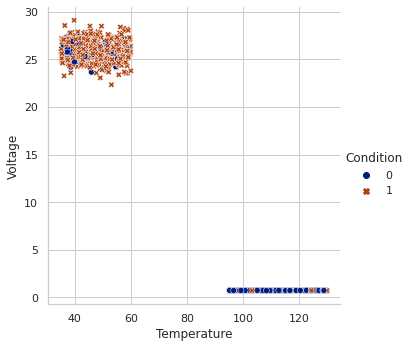

In [459]:
sns.relplot(data=data_pd, x="Temperature", y="Voltage", hue="Condition", style="Condition")

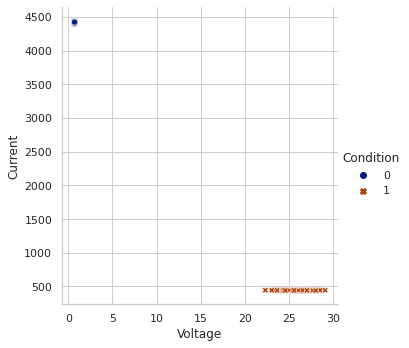

In [458]:
sns.relplot(data=data_pd, x="Voltage", y="Current", hue="Condition", style="Condition")

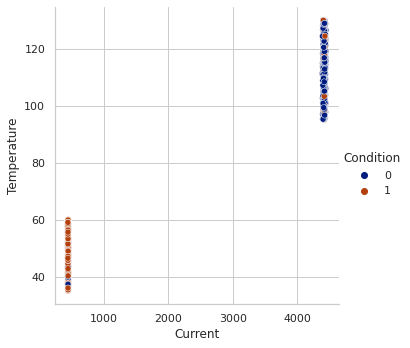

In [453]:
sns.relplot(data=data_pd, x="Current", y="Temperature", hue="Condition", style="Condition")

If we look at the pair plots, we can see that when plot in pairs, the features have two very clear, separated and concentrated centres. We can imagine that when all 3 features are considered together, they should also be having two very clear, separated and concentrated centres. Because the two centres are clear, separated and concentrated, they make it easy for the model to establish the classification rules and classify the data points.

If we look closely to the plot with the Condition in mind, we can see that, in each of the clear, separated and concentrated centre, there are data of both Condition 0 and Condition 1. They are so concentrated together that it is almost impossible to separate (better classify) the Condition 0 and Condition 1 fron the same centre. This is the reason behind the same level of accuracy is achieved by all the models.  